<a href="https://colab.research.google.com/github/danieleinar/Mynstursgreining---Lokaverkefni/blob/main/mynstur_lokaverkefni_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chess

In [ ]:
import chess
import chess.syzygy
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Colab Notebooks'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
tablebase = chess.syzygy.Tablebase()
tablebase.add_directory('Tablebase')

6

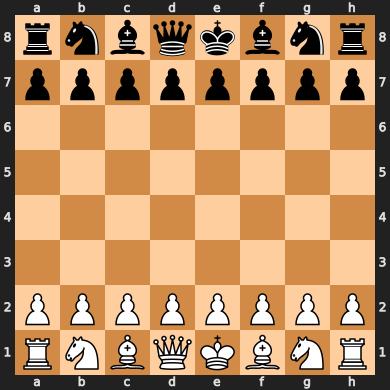

In [ ]:
board = chess.Board()
board

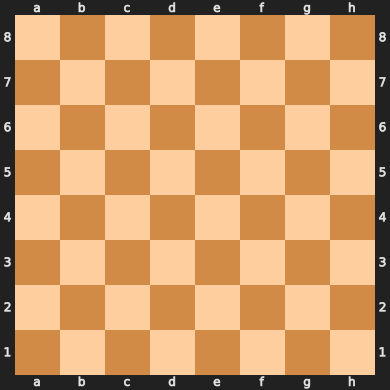

In [ ]:
board.clear()
board

Sömu gögn og áður.

In [ ]:
N = 10000
innmerki = np.zeros((N, 8), dtype=int)
sigur = np.zeros(N, dtype=int)
einkunn = np.zeros(N)

n = 0
teljari = 0
np.random.seed(37)

while n < N:
  reitir = np.random.choice(64, size=4, replace=False)
  teljari += 1
  board.clear()
  board.set_piece_at(reitir[0], chess.Piece(6, 1))  # Hvítur kóngur
  board.set_piece_at(reitir[1], chess.Piece(5, 1))  # Hvít drottning
  board.set_piece_at(reitir[2], chess.Piece(6, 0))  # Svartur kóngur
  board.set_piece_at(reitir[3], chess.Piece(4, 0))  # Svartur hrókur
  board.push(chess.Move.null())                     # Svartur á að leika
  if board.is_valid() and not board.is_checkmate():
    innmerki[n, 0] = chess.square_file(reitir[0])
    innmerki[n, 1] = chess.square_rank(reitir[0])
    innmerki[n, 2] = chess.square_file(reitir[1])
    innmerki[n, 3] = chess.square_rank(reitir[1])
    innmerki[n, 4] = chess.square_file(reitir[2])
    innmerki[n, 5] = chess.square_rank(reitir[2])
    innmerki[n, 6] = chess.square_file(reitir[3])
    innmerki[n, 7] = chess.square_rank(reitir[3])
    dtz = tablebase.probe_dtz(board)
    sigur[n] = (dtz < 0) * 1
    einkunn[n] = dtz / (-2.)
    n += 1

print(teljari)
print(np.sum(sigur))

14070
6643


In [ ]:
fjoldi_sigra = np.sum(sigur)
innmerki_w = np.zeros((fjoldi_sigra, 8), dtype=int)
einkunn_w = np.zeros(fjoldi_sigra)

stak = 0

for n in range(N):
  if sigur[n] == 1:
    innmerki_w[stak] = innmerki[n]
    einkunn_w[stak] = einkunn[n]
    stak += 1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inn_tr, inn_val, sigur_tr, sigur_val = train_test_split(innmerki, sigur, test_size=0.2, random_state=37)
inn_w_tr, inn_w_val, eink_w_tr, eink_w_val = train_test_split(innmerki_w, einkunn_w, test_size=0.2, random_state=37)

In [ ]:
print(inn_tr.shape)
print(inn_val.shape)
print(sigur_tr.shape)
print(sigur_val.shape)
print(inn_w_tr.shape)
print(inn_w_val.shape)
print(eink_w_tr.shape)
print(eink_w_val.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)
(5314, 8)
(1329, 8)
(5314,)
(1329,)


In [ ]:
inn_tr_skalad = inn_tr / 3.5 - 1.0
inn_val_skalad = inn_val / 3.5 - 1.0
inn_w_tr_skalad = inn_w_tr / 3.5 - 1.0
inn_w_val_skalad = inn_w_val / 3.5 - 1.0

importa tensorflow

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.15.0'

Djúpt tauganet með 2 földum lögum - flokkun

In [ ]:
flokkun_1 = keras.models.Sequential()
flokkun_1.add(keras.layers.Dense(64, activation="relu"))
flokkun_1.add(keras.layers.Dense(64, activation="relu"))
flokkun_1.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
flokkun_1.build((None,8))

In [ ]:
flokkun_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                576       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
flokkun_1.layers

In [ ]:
flokkun_1.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [ ]:
history_fl_1 = flokkun_1.fit(inn_tr_skalad, sigur_tr, epochs=50,
                    validation_data=(inn_val_skalad, sigur_val))

Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 0.6245 - accuracy: 0.6587 - val_loss: 0.5990 - val_accuracy: 0.6760
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.5956 - accuracy: 0.6830 - val_loss: 0.5859 - val_accuracy: 0.6870
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 0.5831 - accuracy: 0.6957 - val_loss: 0.5763 - val_accuracy: 0.7000
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 0.5711 - accuracy: 0.7079 - val_loss: 0.5638 - val_accuracy: 0.7085
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5553 - accuracy: 0.7228 - val_loss: 0.5534 - val_accuracy: 0.7250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.7377 - val_loss: 0.5334 - val_accuracy: 0.7370
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5138 - accuracy: 0.7619 - val_loss: 0.5189 - val_accuracy: 0.7645
Epoch 

In [ ]:
history_fl_1.params

{'verbose': 1, 'epochs': 50, 'steps': 250}

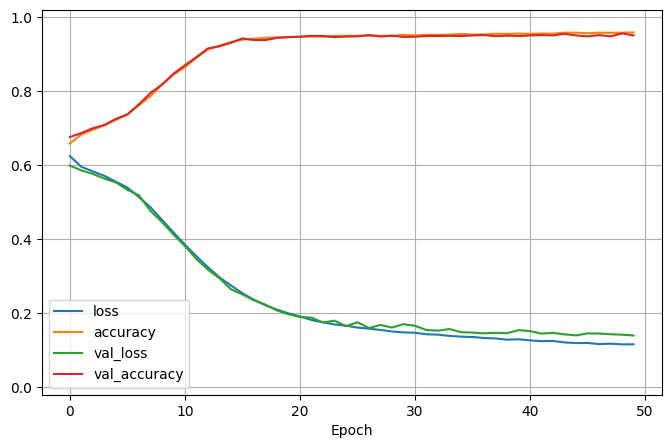

In [ ]:
pd.DataFrame(history_fl_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(-0.02, 1.02)
plt.xlabel('Epoch')
plt.show()

Djúpt tauganet með 4 földum lögum - flokkun

In [ ]:
flokkun_2 = keras.models.Sequential()
flokkun_2.add(keras.layers.Dense(64, activation="relu"))
flokkun_2.add(keras.layers.Dense(64, activation="relu"))
flokkun_2.add(keras.layers.Dense(64, activation="relu"))
flokkun_2.add(keras.layers.Dense(64, activation="relu"))
flokkun_2.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
flokkun_2.build((None,8))

In [ ]:
flokkun_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 64)                576       
                                                                 
 dense_62 (Dense)            (None, 64)                4160      
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13121 (51.25 KB)
Trainable params: 13121 (51.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
flokkun_2.layers

In [ ]:
flokkun_2.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [ ]:
history_fl_2 = flokkun_2.fit(inn_tr_skalad, sigur_tr, epochs=50,
                    validation_data=(inn_val_skalad, sigur_val))

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.6218 - accuracy: 0.6628 - val_loss: 0.6009 - val_accuracy: 0.6795
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5912 - accuracy: 0.6816 - val_loss: 0.5819 - val_accuracy: 0.6830
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5758 - accuracy: 0.6986 - val_loss: 0.5700 - val_accuracy: 0.6990
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5522 - accuracy: 0.7181 - val_loss: 0.5294 - val_accuracy: 0.7385
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7713 - val_loss: 0.4580 - val_accuracy: 0.8065
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8207 - val_loss: 0.4057 - val_accuracy: 0.8290
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8550 - val_loss: 0.3522 - val_accuracy: 0.8605
Epoch 

In [ ]:
history_fl_2.params

{'verbose': 1, 'epochs': 50, 'steps': 250}

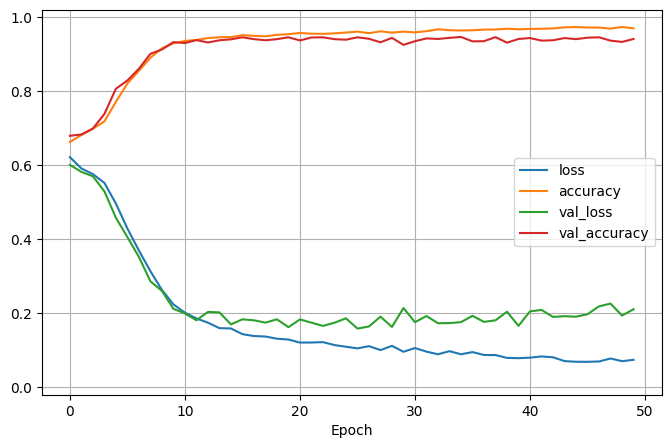

In [ ]:
pd.DataFrame(history_fl_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(-0.02, 1.02)
plt.xlabel('Epoch')
plt.show()

Djúpt tauganet með 3 földum lögum - aðhvarfsgreining

In [ ]:
reg_1 = keras.models.Sequential()
reg_1.add(keras.layers.Dense(40, activation="relu"))
reg_1.add(keras.layers.Dense(40, activation="relu"))
reg_1.add(keras.layers.Dense(40, activation="relu"))
reg_1.add(keras.layers.Dense(1, activation="linear"))

In [ ]:
reg_1.build((None,8))

In [ ]:
reg_1.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 40)                360       
                                                                 
 dense_103 (Dense)           (None, 40)                1640      
                                                                 
 dense_104 (Dense)           (None, 40)                1640      
                                                                 
 dense_105 (Dense)           (None, 1)                 41        
                                                                 
Total params: 3681 (14.38 KB)
Trainable params: 3681 (14.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
reg_1.layers

In [ ]:
reg_1.compile(loss="mse", optimizer='adam', metrics=[keras.metrics.R2Score()])

In [ ]:
history_r_1 = reg_1.fit(inn_w_tr_skalad, eink_w_tr, epochs=100,
                    validation_data=(inn_w_val_skalad, eink_w_val))

Epoch 1/100
167/167 [==============================] - 2s 4ms/step - loss: 161.1900 - r2_score: -1.7447 - val_loss: 60.7097 - val_r2_score: 0.0058
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: 55.3797 - r2_score: 0.0570 - val_loss: 55.9805 - val_r2_score: 0.0832
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 50.6757 - r2_score: 0.1371 - val_loss: 53.2285 - val_r2_score: 0.1283
Epoch 4/100
167/167 [==============================] - 0s 2ms/step - loss: 47.6131 - r2_score: 0.1893 - val_loss: 50.2283 - val_r2_score: 0.1774
Epoch 5/100
167/167 [==============================] - 0s 3ms/step - loss: 45.6919 - r2_score: 0.2220 - val_loss: 48.8352 - val_r2_score: 0.2002
Epoch 6/100
167/167 [==============================] - 0s 3ms/step - loss: 44.3519 - r2_score: 0.2448 - val_loss: 47.0337 - val_r2_score: 0.2297
Epoch 7/100
167/167 [==============================] - 1s 3ms/step - loss: 43.3716 - r2_score: 0.2615 - val_loss: 46.4427 - val_

In [ ]:
history_r_1.params

{'verbose': 1, 'epochs': 100, 'steps': 167}

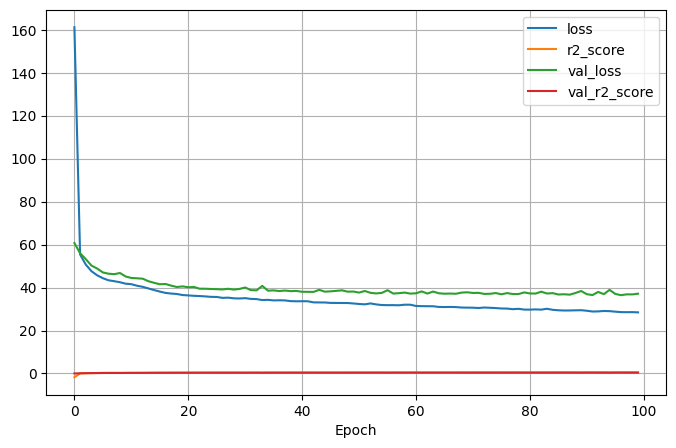

In [ ]:
pd.DataFrame(history_r_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epoch')
plt.show()

Tauganet með 1 földu lagi - aðhvarfsgreining

In [ ]:
reg_2 = keras.models.Sequential()
reg_2.add(keras.layers.Dense(100, activation="relu"))
reg_2.add(keras.layers.Dense(1, activation="linear"))

In [ ]:
reg_2.build((None,8))

In [ ]:
reg_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 100)               900       
                                                                 
 dense_107 (Dense)           (None, 1)                 101       
                                                                 
Total params: 1001 (3.91 KB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
reg_2.layers

In [ ]:
reg_2.compile(loss="mse", optimizer='adam', metrics=[keras.metrics.R2Score()])

In [ ]:
history_r_2 = reg_2.fit(inn_w_tr_skalad, eink_w_tr, epochs=200,
                    validation_data=(inn_w_val_skalad, eink_w_val))

Epoch 1/200
167/167 [==============================] - 2s 6ms/step - loss: 321.0580 - r2_score: -4.4669 - val_loss: 230.4414 - val_r2_score: -2.7739
Epoch 2/200
167/167 [==============================] - 1s 4ms/step - loss: 141.4904 - r2_score: -1.4093 - val_loss: 79.7949 - val_r2_score: -0.3068
Epoch 3/200
167/167 [==============================] - 0s 2ms/step - loss: 61.9352 - r2_score: -0.0546 - val_loss: 59.0764 - val_r2_score: 0.0325
Epoch 4/200
167/167 [==============================] - 0s 2ms/step - loss: 55.2408 - r2_score: 0.0594 - val_loss: 57.4721 - val_r2_score: 0.0588
Epoch 5/200
167/167 [==============================] - 0s 2ms/step - loss: 53.8405 - r2_score: 0.0832 - val_loss: 56.3956 - val_r2_score: 0.0764
Epoch 6/200
167/167 [==============================] - 0s 2ms/step - loss: 52.6140 - r2_score: 0.1041 - val_loss: 55.1243 - val_r2_score: 0.0972
Epoch 7/200
167/167 [==============================] - 0s 2ms/step - loss: 51.3595 - r2_score: 0.1255 - val_loss: 54.0416 

In [ ]:
history_r_2.params

{'verbose': 1, 'epochs': 200, 'steps': 167}

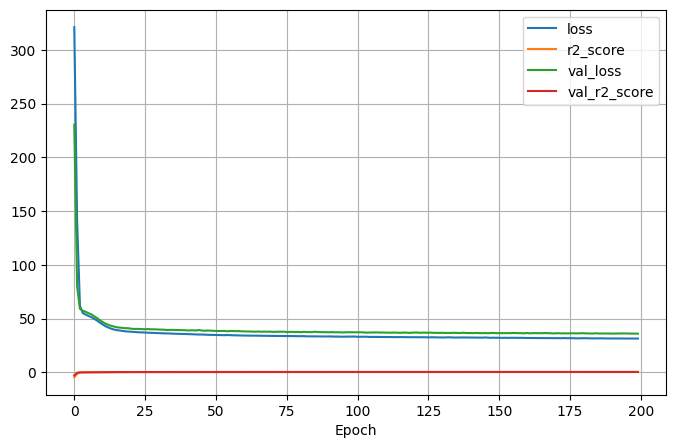

In [ ]:
pd.DataFrame(history_r_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epoch')
plt.show()

Djúpt tauganet með 2 földum lögum - aðhvarfsgreining

In [ ]:
reg_3 = keras.models.Sequential()
reg_3.add(keras.layers.Dense(64, activation="relu"))
reg_3.add(keras.layers.Dense(64, activation="relu"))
reg_3.add(keras.layers.Dense(1, activation="linear"))

In [ ]:
reg_3.build((None,8))

In [ ]:
reg_3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 64)                576       
                                                                 
 dense_109 (Dense)           (None, 64)                4160      
                                                                 
 dense_110 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
reg_3.layers

In [ ]:
reg_3.compile(loss="mse", optimizer='adam', metrics=[keras.metrics.R2Score()])

In [ ]:
history_r_3 = reg_3.fit(inn_w_tr_skalad, eink_w_tr, epochs=200,
                    validation_data=(inn_w_val_skalad, eink_w_val))

Epoch 1/200
167/167 [==============================] - 1s 4ms/step - loss: 163.2885 - r2_score: -1.7804 - val_loss: 59.9079 - val_r2_score: 0.0189
Epoch 2/200
167/167 [==============================] - 0s 3ms/step - loss: 54.6017 - r2_score: 0.0703 - val_loss: 55.8720 - val_r2_score: 0.0850
Epoch 3/200
167/167 [==============================] - 0s 3ms/step - loss: 51.3699 - r2_score: 0.1253 - val_loss: 53.7895 - val_r2_score: 0.1191
Epoch 4/200
167/167 [==============================] - 0s 3ms/step - loss: 49.4424 - r2_score: 0.1581 - val_loss: 52.4790 - val_r2_score: 0.1406
Epoch 5/200
167/167 [==============================] - 0s 2ms/step - loss: 48.4300 - r2_score: 0.1753 - val_loss: 51.3863 - val_r2_score: 0.1585
Epoch 6/200
167/167 [==============================] - 0s 3ms/step - loss: 47.5974 - r2_score: 0.1895 - val_loss: 50.9745 - val_r2_score: 0.1652
Epoch 7/200
167/167 [==============================] - 0s 3ms/step - loss: 46.8198 - r2_score: 0.2028 - val_loss: 50.1953 - val_

In [ ]:
history_r_3.params

{'verbose': 1, 'epochs': 200, 'steps': 167}

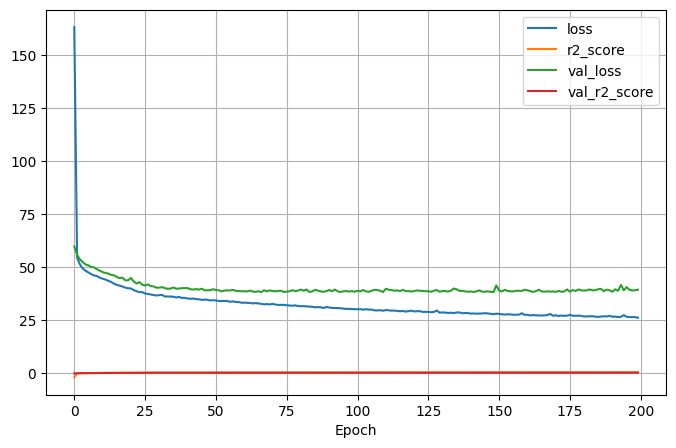

In [ ]:
pd.DataFrame(history_r_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epoch')
plt.show()